Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 2)         20        
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 50)        150       
                                                                 
 flatten_2 (Flatten)         (None, 39200)             0         
                                                                 
 dense_4 (Dense)             (None, 50)                1960050   
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1960271 (7.48 MB)
Trainable params: 1960271 (

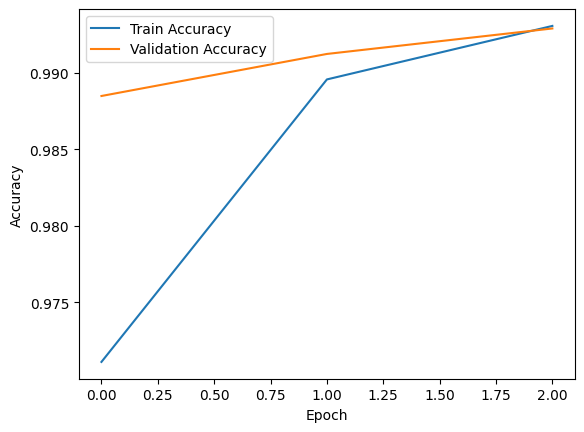

In [3]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Input, Conv2D, Flatten, Dense
from keras.models import Model

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Modify labels: 8s are labeled as 1, non-8s are labeled as 0
y_train_binary = np.where(y_train == 8, 1, 0)
y_test_binary = np.where(y_test == 8, 1, 0)

# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# Split the dataset into training and validation sets
X_train, X_val, y_train_binary, y_val_binary = train_test_split(X_train, y_train_binary, test_size=0.2, random_state=42)

# Define the model architecture
input_layer = Input(shape=(28, 28, 1))

# Same convolution with 2 channels and paddings
conv1 = Conv2D(2, (3, 3), padding='same', activation='relu')(input_layer)

# Another convolution into a 1x1x50 volume
conv2 = Conv2D(50, (1, 1), activation='relu')(conv1)

# Flatten the output for the fully connected layer
flatten = Flatten()(conv2)

# Fully connected layer with 50 units
fc = Dense(50, activation='relu')(flatten)

# Output layer
output_layer = Dense(1, activation='sigmoid')(fc)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Display the model summary
model.summary()

# Retrieve layer outputs and weights
layer_outputs = [layer.output for layer in model.layers]
layer_weights = [layer.get_weights() for layer in model.layers]

# Display layer names and their corresponding output shape

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_binary, epochs=3, batch_size=64, validation_data=(X_val, y_val_binary))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test_binary)
print(f'Test accuracy: {test_acc}')

for layer, output, weights in zip(model.layers, layer_outputs, layer_weights):
    print(f"Layer Name: {layer.name}, Output Shape: {output.shape}, Weights: {weights}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
